1. Please consider a neural network with three layers (input, hidden and output). Let the input layer consist of, say 20 neurons, the output layer of 8 neurons, and the hidden layer - according to your convenience. Please provide a 3D visualization of the network and the find a way to convert the graphics file to sound.


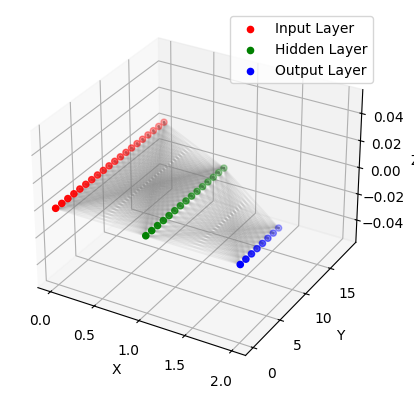

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define layer sizes
input_neurons = 20
hidden_neurons = 15
output_neurons = 8

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot input layer
input_layer = np.array([[0, i, 0] for i in range(input_neurons)])
ax.scatter(input_layer[:, 0], input_layer[:, 1], input_layer[:, 2], c='r', label='Input Layer')

# Plot hidden layer
hidden_layer = np.array([[1, i, 0] for i in range(hidden_neurons)])
ax.scatter(hidden_layer[:, 0], hidden_layer[:, 1], hidden_layer[:, 2], c='g', label='Hidden Layer')

# Plot output layer
output_layer = np.array([[2, i, 0] for i in range(output_neurons)])
ax.scatter(output_layer[:, 0], output_layer[:, 1], output_layer[:, 2], c='b', label='Output Layer')

# Draw connections between layers
for i in range(input_neurons):
    for j in range(hidden_neurons):
        ax.plot([input_layer[i, 0], hidden_layer[j, 0]],
                [input_layer[i, 1], hidden_layer[j, 1]],
                [input_layer[i, 2], hidden_layer[j, 2]], c='gray', alpha=0.1)

for i in range(hidden_neurons):
    for j in range(output_neurons):
        ax.plot([hidden_layer[i, 0], output_layer[j, 0]],
                [hidden_layer[i, 1], output_layer[j, 1]],
                [hidden_layer[i, 2], output_layer[j, 2]], c='gray', alpha=0.1)

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show plot
plt.show()

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.generators import Sine

In [ ]:
from pydub import AudioSegment
from pydub.generators import Sine

In [ ]:
def map_to_sound(x, y, z):
    frequency = 200 + x * 100  # Map X to frequency
    amplitude = y / 20         # Map Y to amplitude (normalize)
    duration = 100 + z * 50    # Map Z to duration (ms)
    return frequency, amplitude, duration

In [ ]:
sounds = []
for neuron in input_layer:  # Use your neuron coordinates data
    freq, amp, dur = map_to_sound(*neuron)
    tone = Sine(freq).to_audio_segment(duration=dur).apply_gain(amp * 20)
    sounds.append(tone)

In [ ]:
final_sound = sum(sounds)

In [ ]:
final_sound.export("neural_sound.wav", format="wav")

<_io.BufferedRandom name='neural_sound.wav'>

In [ ]:
from IPython.display import Audio

final_sound_array = final_sound.get_array_of_samples()
final_sound_array = np.array(final_sound_array).astype(np.int16)

# Display the audio for playback
display(Audio(data=final_sound_array, rate=final_sound.frame_rate))

Repeat the above exercises for a more complicated architecture of the neural network like VGG-16.

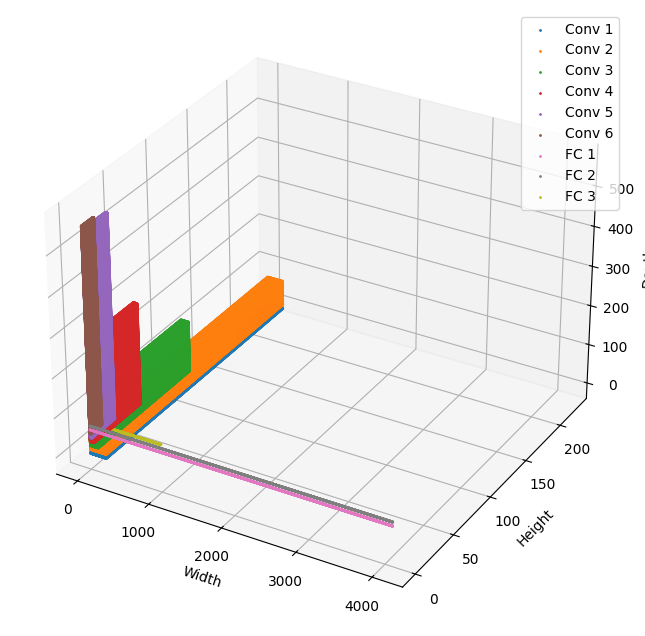

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define VGG-16 layer sizes (simplified)
layer_sizes = [
    (224, 224, 3),   # Input
    (224, 224, 64),  # Conv1
    (112, 112, 128), # Conv2
    (56, 56, 256),   # Conv3
    (28, 28, 512),   # Conv4
    (14, 14, 512),   # Conv5
    (4096,),         # FC1
    (4096,),         # FC2
    (1000,)          # Output
]

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each layer
for i, size in enumerate(layer_sizes):
    if len(size) == 3:  # Convolutional layer
        x, y, z = np.meshgrid(np.arange(size[0]), np.arange(size[1]), np.arange(size[2]))
        ax.scatter(x.flatten(), y.flatten(), z.flatten() + i * 10, s=1, label=f'Conv {i+1}')
    else:  # Fully connected layer
        x = np.arange(size[0])
        y = np.zeros_like(x)
        z = np.full_like(x, i * 10)
        ax.scatter(x, y, z, s=1, label=f'FC {i+1 - 6}')

# Add labels and legend
ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Depth')
ax.legend()

# Show plot
plt.show()

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.generators import Sine

# Example: Map neuron coordinates to sound
def map_to_sound(x, y, z):
    frequency = 100 + x * 10  # Map X to frequency
    amplitude = y / 100       # Map Y to amplitude (normalize)
    duration = 50 + z * 10    # Map Z to duration (ms)
    return frequency, amplitude, duration

# Generate sound for each layer
sounds = []
for i, size in enumerate(layer_sizes):
    if len(size) == 3:  # Convolutional layer
        x, y, z = np.meshgrid(np.arange(size[0]), np.arange(size[1]), np.arange(size[2]))
        for xi, yi, zi in zip(x.flatten(), y.flatten(), z.flatten()):
            freq, amp, dur = map_to_sound(xi, yi, zi)
            tone = Sine(freq).to_audio_segment(duration=dur).apply_gain(amp * 20)
            sounds.append(tone)
    else:  # Fully connected layer
        for xi in range(size[0]):
            freq, amp, dur = map_to_sound(xi, 0, i * 10)
            tone = Sine(freq).to_audio_segment(duration=dur).apply_gain(amp * 20)
            sounds.append(tone)

# Combine sounds
final_sound = sum(sounds)

# Export to file
final_sound.export("vgg16_sound.wav", format="wav")

In [ ]:
from IPython.display import Audio

final_sound_array = final_sound.get_array_of_samples()
final_sound_array = np.array(final_sound_array).astype(np.int16)

# Display the audio for playback
display(Audio(data=final_sound_array, rate=final_sound.frame_rate))